### Supply and demand analyses

In [1]:
import pandas as pd
uber_df=pd.read_csv("Uber Request Data.csv")
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [2]:
uber_df.shape

(6745, 6)

In [3]:
len(uber_df["Request id"].unique())

6745

In [4]:
uber_df.isnull().any()

Request id           False
Pickup point         False
Driver id             True
Status               False
Request timestamp    False
Drop timestamp        True
dtype: bool

In [5]:
uber_df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [6]:
uber_df.isnull().sum()/uber_df.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [7]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [8]:
uber_df["Request timestamp"].value_counts()

11/7/2016 8:37         6
11/7/2016 17:57        6
11/7/2016 19:02        6
11/7/2016 9:40         6
11/7/2016 5:12         5
                      ..
13-07-2016 19:06:14    1
14-07-2016 13:48:48    1
15-07-2016 03:07:48    1
13-07-2016 06:13:27    1
14-07-2016 05:06:35    1
Name: Request timestamp, Length: 5618, dtype: int64

In [9]:
uber_df["Request timestamp"]=uber_df["Request timestamp"].astype(str)

In [10]:
uber_df["Request timestamp"]=uber_df["Request timestamp"].replace("/","-")

In [11]:
uber_df["Request timestamp"]=pd.to_datetime(uber_df["Request timestamp"],dayfirst=True)

In [12]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.3+ KB


In [13]:
uber_df["Request timestamp"]

0      2016-07-11 11:51:00
1      2016-07-11 17:57:00
2      2016-07-12 09:17:00
3      2016-07-12 21:08:00
4      2016-07-13 08:33:16
               ...        
6740   2016-07-15 23:49:03
6741   2016-07-15 23:50:05
6742   2016-07-15 23:52:06
6743   2016-07-15 23:54:39
6744   2016-07-15 23:55:03
Name: Request timestamp, Length: 6745, dtype: datetime64[ns]

In [14]:
uber_df["Drop timestamp"]=pd.to_datetime(uber_df["Drop timestamp"],dayfirst=True)

In [15]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [16]:
uber_df["Drop timestamp"]

0      2016-07-11 13:00:00
1      2016-07-11 18:47:00
2      2016-07-12 09:58:00
3      2016-07-12 22:03:00
4      2016-07-13 09:25:47
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

In [17]:
uber_df["Request timestamp"]

0      2016-07-11 11:51:00
1      2016-07-11 17:57:00
2      2016-07-12 09:17:00
3      2016-07-12 21:08:00
4      2016-07-13 08:33:16
               ...        
6740   2016-07-15 23:49:03
6741   2016-07-15 23:50:05
6742   2016-07-15 23:52:06
6743   2016-07-15 23:54:39
6744   2016-07-15 23:55:03
Name: Request timestamp, Length: 6745, dtype: datetime64[ns]

In [18]:
len(uber_df["Request timestamp"].dt.month.unique())

1

In [19]:
len(uber_df["Request timestamp"].dt.day.unique())

5

In [20]:
req_hour=uber_df["Request timestamp"].dt.hour
req_hour

0       11
1       17
2        9
3       21
4        8
        ..
6740    23
6741    23
6742    23
6743    23
6744    23
Name: Request timestamp, Length: 6745, dtype: int64

In [21]:
uber_df["req_hour"]=req_hour
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


In [22]:
req_day=uber_df["Request timestamp"].dt.day
uber_df["req_day"]=req_day
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13


In [23]:
uber_df["Status"].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [24]:
uber_df["Pickup point"].unique()

array(['Airport', 'City'], dtype=object)

In [25]:
print(len(uber_df[uber_df["Status"]=="Trip Completed"]))
print(len(uber_df[uber_df["Status"]=="Cancelled"]))
print(len(uber_df[uber_df["Status"]=="No Cars Available"]))

2831
1264
2650


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams

rcParams['figure.figsize'] = 15,6


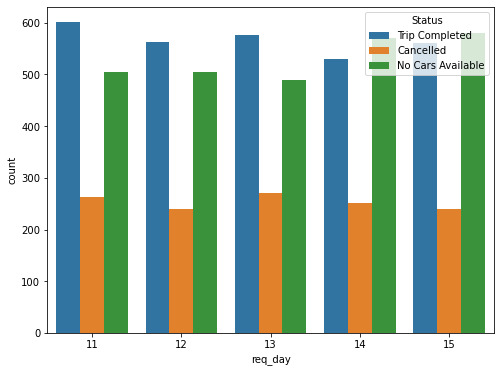

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x="req_day", data=uber_df, hue="Status")
plt.show()

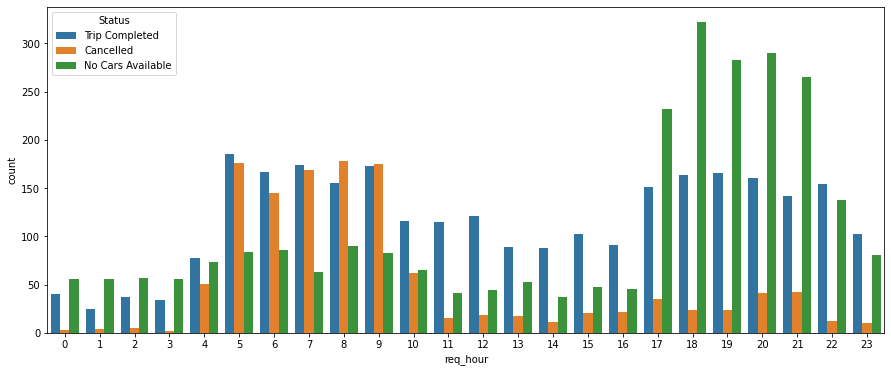

In [28]:
sns.countplot(x="req_hour", data=uber_df, hue="Status")
plt.show()

/home/mayank/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


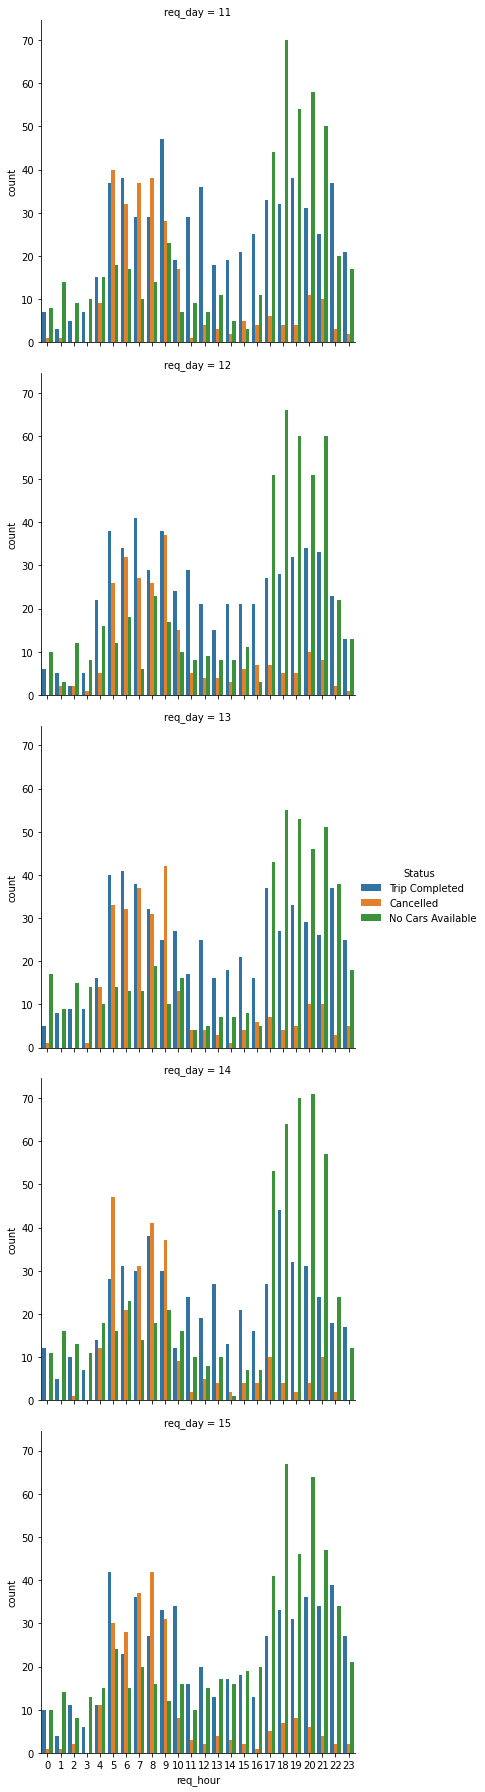

In [29]:
sns.factorplot(x="req_hour", data=uber_df, row="req_day", hue="Status", kind="count")
plt.show()

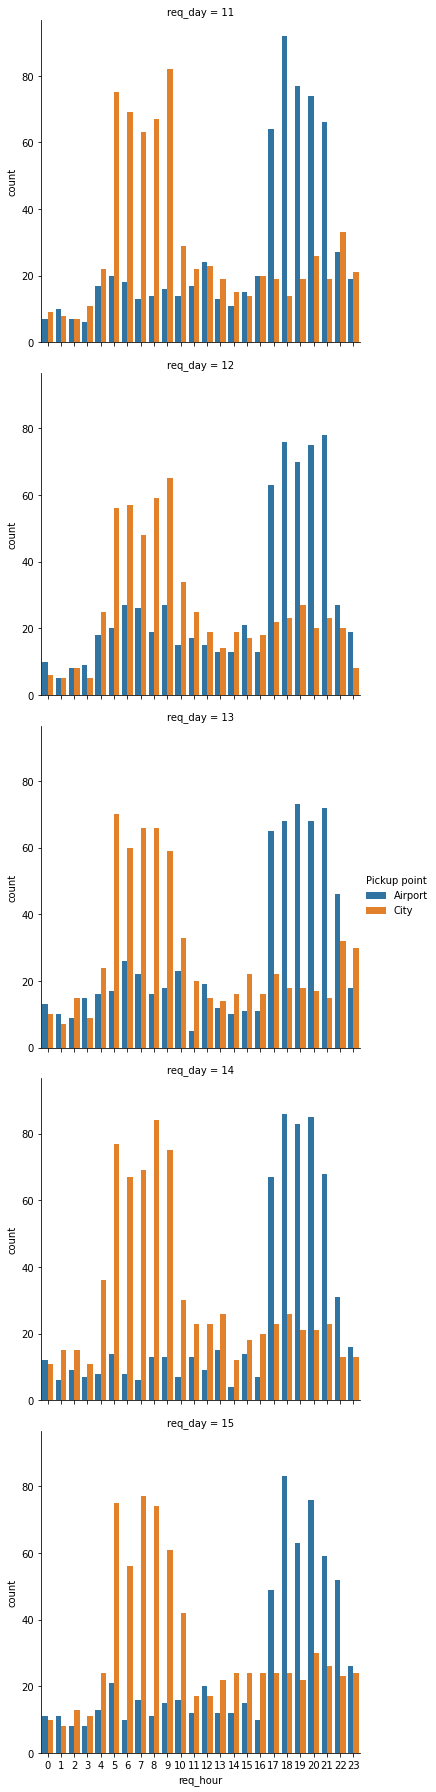

In [30]:
sns.factorplot(x="req_hour", data=uber_df, row="req_day", hue="Pickup point", kind="count")
plt.show()

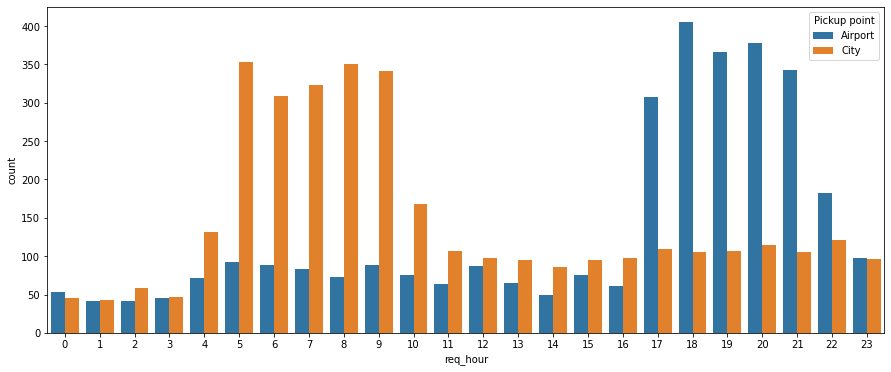

In [31]:

sns.countplot(x="req_hour", data=uber_df, hue="Pickup point")
plt.show()

In [32]:
uber_df["Time_Slot"]=0
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,0


In [33]:
j=0
for i in uber_df["req_hour"]:
    if uber_df.iloc[j,6]<5:
        uber_df.iloc[j,8]="Pre Morning"
    elif 5<=uber_df.iloc[j,6]<10:
        uber_df.iloc[j,8]="Morning Rush"
    elif 10<=uber_df.iloc[j,6]<17:
        uber_df.iloc[j,8]="Day Time"
    elif 17<=uber_df.iloc[j,6]<22:
        uber_df.iloc[j,8]="Evening Rush"
    else:
        uber_df.iloc[j,8]="Late Night"
    j=j+1    

**Pre Morning = Before `5` AM**

**Morning Rush= Between `5` AM To `Before 10` AM**

**Day Time    = Between `10` AM To `Before 5` PM**

**Evening Rush= Between `5` AM To `Before 10` PM**

**Late Night  = From `10` PM**

In [34]:
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning Rush


In [35]:
uber_df["Time_Slot"].value_counts()

Evening Rush    2342
Morning Rush    2103
Day Time        1224
Pre Morning      578
Late Night       498
Name: Time_Slot, dtype: int64

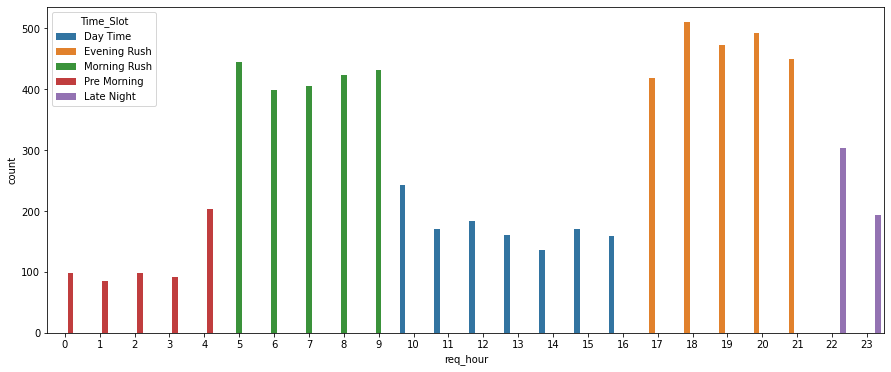

In [36]:
sns.countplot(x="req_hour", data=uber_df, hue="Time_Slot")
plt.show()

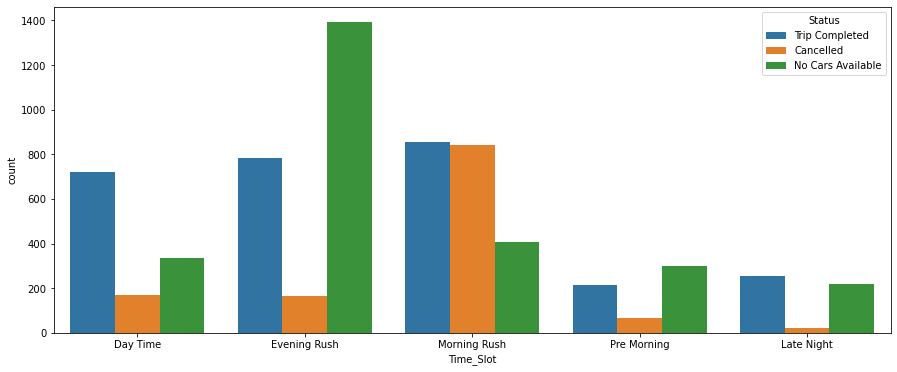

In [37]:
sns.countplot(x="Time_Slot", data=uber_df, hue="Status")
plt.show()

In [38]:
Uber_morning_rush=uber_df[uber_df["Time_Slot"]=="Morning Rush"]

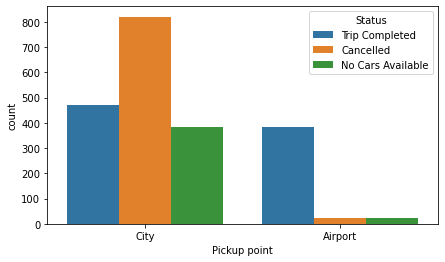

In [39]:
plt.figure(figsize=(7,4))
sns.countplot(x="Pickup point", data=Uber_morning_rush, hue="Status")
plt.show()

## Severity of problem by location and their count (cancellation of cab as per the pickup location at morning rush hours)

In [40]:
Uber_morning_rush.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Morning Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Morning Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning Rush


In [41]:
Uber_morning_airport_cancelled=Uber_morning_rush.loc[(Uber_morning_rush["Pickup point"]=="Airport") & (Uber_morning_rush["Status"]=="Cancelled")].shape[0]

In [42]:
Uber_morning_airport_cancelled

23

In [43]:
Uber_morning_city_cancelled=Uber_morning_rush.loc[(Uber_morning_rush["Pickup point"]=="City") & (Uber_morning_rush["Status"]=="Cancelled")].shape[0]

In [44]:
Uber_morning_city_cancelled

820

## Supply and Demand

###  1. For Morning Rush

In [45]:
Uber_morning_city_demand=Uber_morning_rush[Uber_morning_rush["Pickup point"]=="City"].shape[0]
Uber_morning_city_demand

1677

In [46]:
Uber_morning_city_tripcompleted=Uber_morning_rush.loc[(Uber_morning_rush["Pickup point"]=="City") & (Uber_morning_rush["Status"]=="Trip Completed")].shape[0]
Uber_morning_city_tripcompleted

472

In [47]:
Uber_morning_airport_demand=Uber_morning_rush[Uber_morning_rush["Pickup point"]=="Airport"].shape[0]
Uber_morning_airport_demand

426

In [48]:
Uber_morning_airport_tripcompleted=Uber_morning_rush.loc[(Uber_morning_rush["Pickup point"]=="Airport") & (Uber_morning_rush["Status"]=="Trip Completed")].shape[0]
Uber_morning_airport_tripcompleted

382

In [49]:
print("Uber Morning City Demand" + " " + "is" + " " + str(Uber_morning_city_demand))
print("Uber Morning City trip completed" + " " + "is" + " " + str(Uber_morning_city_tripcompleted))
print("Uber Morning Airport Demand" + " " + "is" + " " + str(Uber_morning_airport_demand))
print("Uber Morning Airport trip completed" + " " + "is" + " " + str(Uber_morning_airport_tripcompleted))

Uber Morning City Demand is 1677
Uber Morning City trip completed is 472
Uber Morning Airport Demand is 426
Uber Morning Airport trip completed is 382


### 2. Evening Rush

In [50]:
Uber_evening_rush=uber_df[uber_df["Time_Slot"]=="Evening Rush"]

In [51]:
Uber_evening_city_demand=Uber_evening_rush[Uber_evening_rush["Pickup point"]=="City"].shape[0]
Uber_evening_city_tripcompleted=Uber_evening_rush.loc[(Uber_evening_rush["Pickup point"]=="City") & (Uber_evening_rush["Status"]=="Trip Completed")].shape[0]
Uber_evening_airport_demand=Uber_evening_rush[Uber_evening_rush["Pickup point"]=="Airport"].shape[0]
Uber_evening_airport_tripcompleted=Uber_evening_rush.loc[(Uber_evening_rush["Pickup point"]=="Airport") & (Uber_evening_rush["Status"]=="Trip Completed")].shape[0]

In [52]:
print("Uber Evening City Demand" + " " + "is" + " " + str(Uber_evening_city_demand))
print("Uber Evening City trip Completed" + " " + "is" + " " + str(Uber_evening_city_tripcompleted))
print("Uber Evening Airport Demand" + " " + "is" + " " + str(Uber_evening_airport_demand))
print("Uber Evening Airport trip Completed" + " " + "is" + " " + str(Uber_evening_airport_tripcompleted))

Uber Evening City Demand is 542
Uber Evening City trip Completed is 411
Uber Evening Airport Demand is 1800
Uber Evening Airport trip Completed is 373


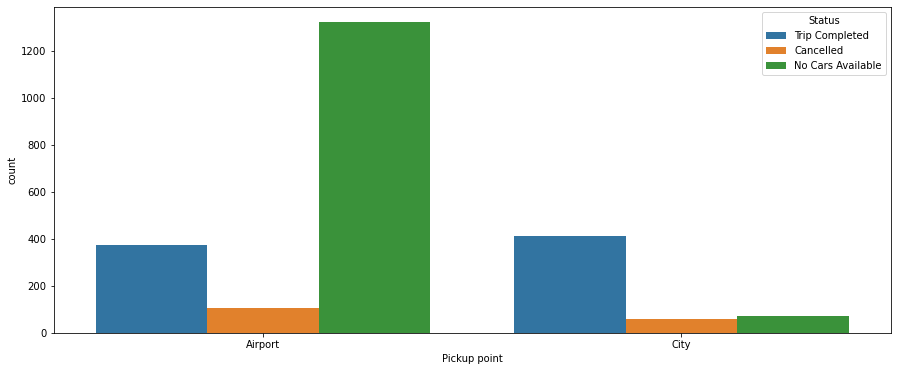

In [53]:
sns.countplot(x="Pickup point", data=Uber_evening_rush, hue="Status")
plt.show()

## Severity of problem of `Cancellation` 

In [54]:
Uber_evening_airport_cancelled=Uber_evening_rush.loc[(Uber_evening_rush["Pickup point"]=="Airport") & (Uber_evening_rush["Status"]=="Cancelled")].shape[0]
Uber_evening_city_cancelled=Uber_evening_rush.loc[(Uber_evening_rush["Pickup point"]=="City") & (Uber_evening_rush["Status"]=="Cancelled")].shape[0]

In [55]:
print("Uber Evening Airport Trip Cancelled" + " " + "is" + " " + str(Uber_evening_airport_cancelled))
print("Uber Evening City Trip Cancelled" + " " + "is" + " " + str(Uber_evening_city_cancelled))

Uber Evening Airport Trip Cancelled is 106
Uber Evening City Trip Cancelled is 60


In [56]:
print("Uber Morning Airport Trip Cancelled" + " " + "is" + " " + str(Uber_morning_airport_cancelled))
print("Uber Morning City Trip Cancelled" + " " + "is" + " " + str(Uber_morning_city_cancelled))

Uber Morning Airport Trip Cancelled is 23
Uber Morning City Trip Cancelled is 820


In [57]:
uber_df["Status"].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

## Severity of problem of  `No Cars Available`

In [58]:
Uber_evening_airport_no_cars=Uber_evening_rush.loc[(Uber_evening_rush["Pickup point"]=="Airport") & (Uber_evening_rush["Status"]=="No Cars Available")].shape[0]
Uber_evening_city_no_cars=Uber_evening_rush.loc[(Uber_evening_rush["Pickup point"]=="City") & (Uber_evening_rush["Status"]=="No Cars Available")].shape[0]

In [59]:
print("Uber Evening Airport No Cars Available" + " " + "is" + " " + str(Uber_evening_airport_no_cars))
print("Uber Evening City No Cars Available" + " " + "is" + " " + str(Uber_evening_city_no_cars))

Uber Evening Airport No Cars Available is 1321
Uber Evening City No Cars Available is 71


In [60]:
Uber_morning_airport_no_cars=Uber_morning_rush.loc[(Uber_morning_rush["Pickup point"]=="Airport") & (Uber_morning_rush["Status"]=="No Cars Available")].shape[0]
Uber_morning_city_no_cars=Uber_morning_rush.loc[(Uber_morning_rush["Pickup point"]=="City") & (Uber_morning_rush["Status"]=="No Cars Available")].shape[0]

In [61]:
print("Uber Morning Airport No Cars Available" + " " + "is" + " " + str(Uber_morning_airport_no_cars))
print("Uber Morning City No Cars Available" + " " + "is" + " " + str(Uber_morning_city_no_cars))

Uber Morning Airport No Cars Available is 21
Uber Morning City No Cars Available is 385


## Severity of problem by location in `Morning Rush`

### 1. City

In [62]:
print("Uber Morning City Demand" + " " + "is" + " " + str(Uber_morning_city_demand))
print("Uber Morning City trip Completed" + " " + "is" + " " + str(Uber_morning_city_tripcompleted))
print("Uber Morning City Trip Cancelled" + " " + "is" + " " + str(Uber_morning_city_cancelled))
print("Uber Morning City No Cars Available" + " " + "is" + " " + str(Uber_morning_city_no_cars))

Uber Morning City Demand is 1677
Uber Morning City trip Completed is 472
Uber Morning City Trip Cancelled is 820
Uber Morning City No Cars Available is 385


### 2. Airport

In [63]:
print("Uber Morning Airport Demand" + " " + "is" + " " + str(Uber_morning_airport_demand))
print("Uber Morning Airport trip completed" + " " + "is" + " " + str(Uber_morning_airport_tripcompleted))
print("Uber Morning Airport Trip Cancelled" + " " + "is" + " " + str(Uber_morning_airport_cancelled))
print("Uber Morning Airport No Cars Available" + " " + "is" + " " + str(Uber_morning_airport_no_cars))

Uber Morning Airport Demand is 426
Uber Morning Airport trip completed is 382
Uber Morning Airport Trip Cancelled is 23
Uber Morning Airport No Cars Available is 21


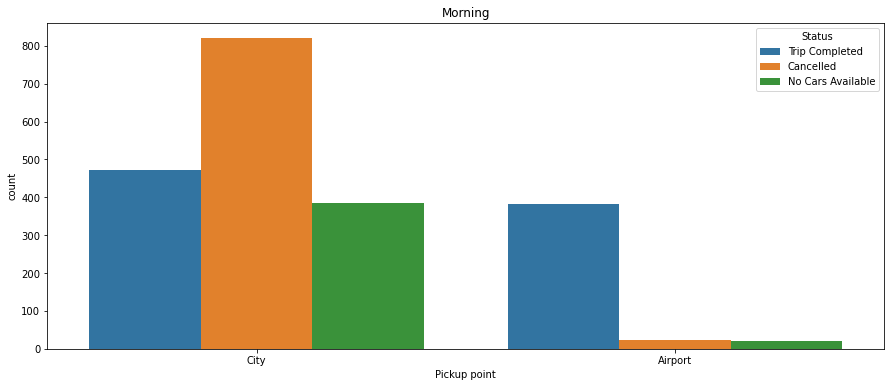

In [64]:
sns.countplot(x="Pickup point", data=Uber_morning_rush, hue="Status")
plt.title('Morning')
plt.show()

## Severity of problem by location in `Evening Rush`

### 1. City

In [65]:
print("Uber Evening City Demand" + " " + "is" + " " + str(Uber_evening_city_demand))
print("Uber Evening City trip completed" + " " + "is" + " " + str(Uber_evening_city_tripcompleted))
print("Uber Evening City Trip Cancelled" + " " + "is" + " " + str(Uber_evening_city_cancelled))
print("Uber Evening City No Cars Available" + " " + "is" + " " + str(Uber_evening_city_no_cars))

Uber Evening City Demand is 542
Uber Evening City trip completed is 411
Uber Evening City Trip Cancelled is 60
Uber Evening City No Cars Available is 71


### 2. Airport

In [66]:
print("Uber Evening Airport Demand" + " " + "is" + " " + str(Uber_evening_airport_demand))
print("Uber Evening Airport trip completed" + " " + "is" + " " + str(Uber_evening_airport_tripcompleted))
print("Uber Evening Airport Trip Cancelled" + " " + "is" + " " + str(Uber_evening_airport_cancelled))
print("Uber Evening Airport No Cars Available" + " " + "is" + " " + str(Uber_evening_airport_no_cars))

Uber Evening Airport Demand is 1800
Uber Evening Airport trip completed is 373
Uber Evening Airport Trip Cancelled is 106
Uber Evening Airport No Cars Available is 1321


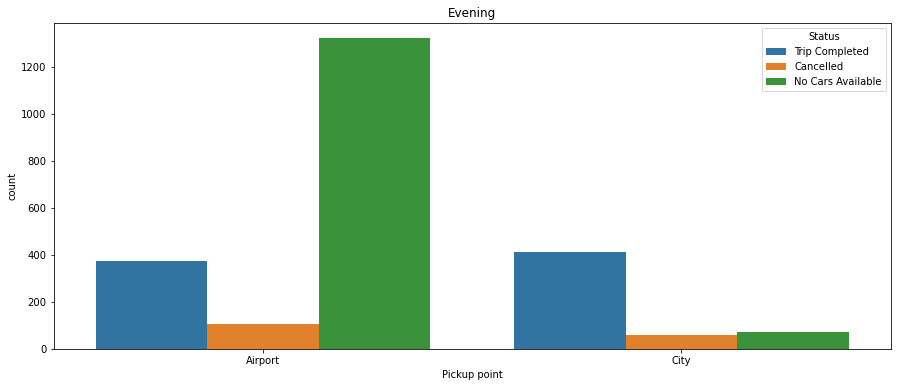

In [67]:
sns.countplot(x="Pickup point", data=Uber_evening_rush, hue="Status")
plt.title('Evening')
plt.show()

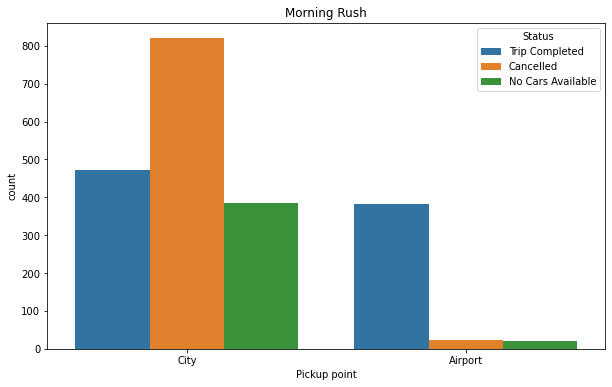

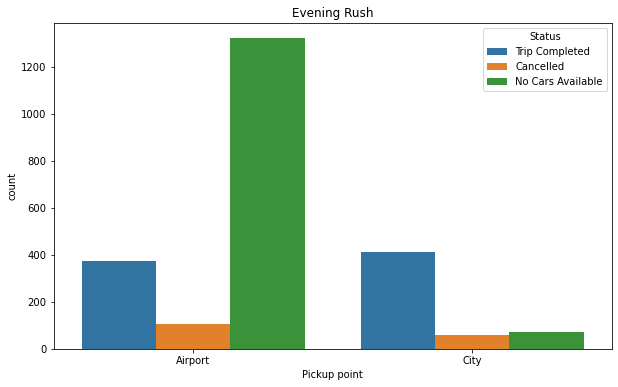

In [68]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x="Pickup point",data = Uber_morning_rush, hue="Status")
ax.set_title("Morning Rush")

plt.subplots
plt.figure(figsize=(10,6))
ax1=sns.countplot(x="Pickup point",data=Uber_evening_rush, hue="Status")
ax1.set_title("Evening Rush")


plt.show()

## Pie Chart

In [69]:
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning Rush


### City Evening and Morning Pickup Status

In [70]:
Evening_city=uber_df[(uber_df["Pickup point"]=="City")&(uber_df["Time_Slot"]=="Evening Rush")]
Morning_city=uber_df[(uber_df["Pickup point"]=="City")&(uber_df["Time_Slot"]=="Morning Rush")]

In [71]:
Evening_city_count=pd.DataFrame(Evening_city["Status"].value_counts())
Morning_city_count=pd.DataFrame(Morning_city["Status"].value_counts())

In [72]:
Evening_city_count["Status"].values

array([411,  71,  60])

In [73]:
Evening_city_count["Status"].index

Index(['Trip Completed', 'No Cars Available', 'Cancelled'], dtype='object')

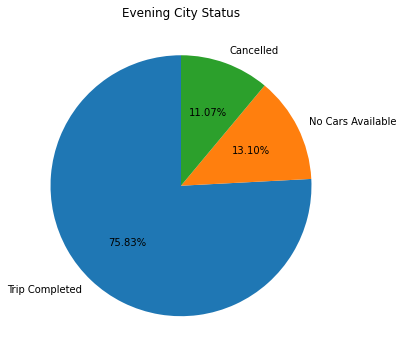

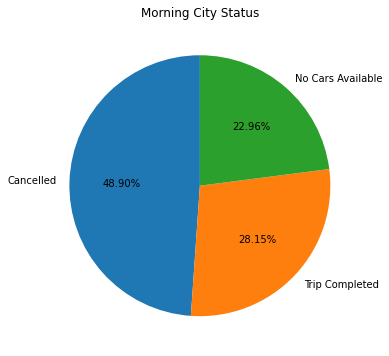

In [74]:
fig,ax=plt.subplots()
ax.pie(Evening_city_count["Status"].values, labels=Evening_city_count["Status"].index, autopct="%.2f%%", startangle=90)
ax.set_title("Evening City Status")

fig,ax1=plt.subplots()
ax1.pie(Morning_city_count["Status"].values, labels=Morning_city_count["Status"].index, autopct="%.2f%%", startangle=90)
ax1.set_title("Morning City Status")
plt.show()


###  Airport Evening & Morning Pickup Status

In [75]:
Uber_morning_rush[["Pickup point","Status"]][Uber_morning_rush["Pickup point"]=="City"].head()

,Pickup point,Status
2,City,Trip Completed
4,City,Trip Completed
9,City,Trip Completed
13,City,Trip Completed
30,City,Trip Completed


In [76]:
Evening_airport=uber_df[(uber_df["Pickup point"]=="Airport")&(uber_df["Time_Slot"]=="Evening Rush")]
Morning_airport=uber_df[(uber_df["Pickup point"]=="Airport")&(uber_df["Time_Slot"]=="Morning Rush")]

In [77]:
Evening_airport_count=pd.DataFrame(Evening_airport["Status"].value_counts())
Morning_airport_count=pd.DataFrame(Morning_airport["Status"].value_counts())

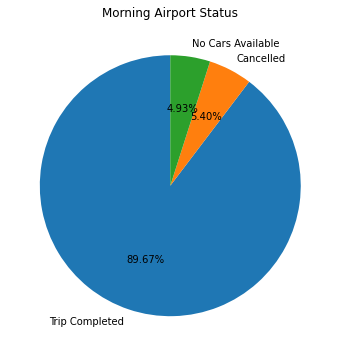

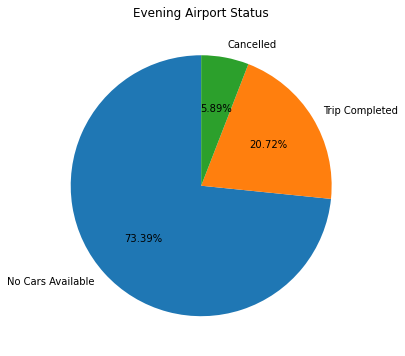

In [78]:
fig,ax=plt.subplots()
ax.pie(Morning_airport_count["Status"].values, labels=Morning_airport_count["Status"].index, autopct="%.2f%%", startangle=90)
ax.set_title("Morning Airport Status")

fig,ax1=plt.subplots()
ax1.pie(Evening_airport_count["Status"].values, labels=Evening_airport_count["Status"].index, autopct="%.2f%%", startangle=90)
ax1.set_title("Evening Airport Status")
plt.show()

### PieChart of Airport and City Status  (Evening and Morning) 

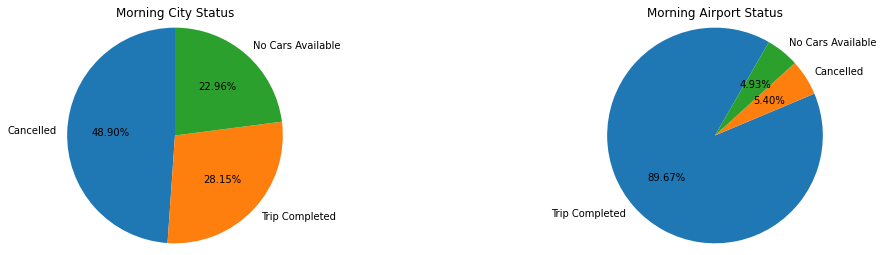

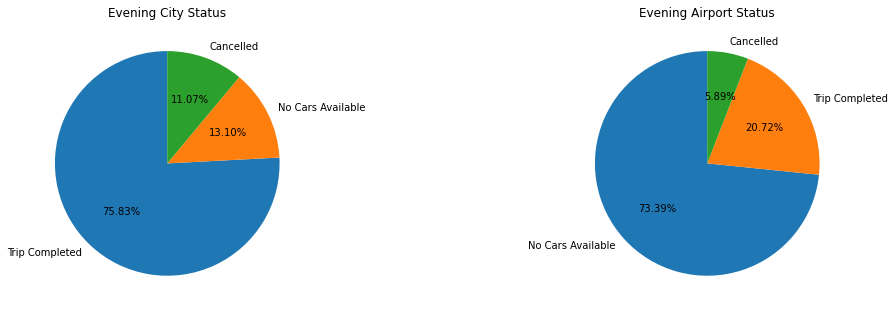

In [79]:
fig=plt.figure()


ax = fig.add_axes([0, 0, .55, .52], aspect=1)
ax.pie(Morning_city_count["Status"].values, labels=Morning_city_count["Status"].index,radius= 1.2, autopct="%.2f%%", startangle=90)
ax.set_title("Morning City Status")
ax1 = fig.add_axes([.5, .0, .55, .52], aspect=1)
ax1.pie(Morning_airport_count["Status"].values, labels=Morning_airport_count["Status"].index,radius=1.2, autopct="%.2f%%", startangle=60)
ax1.set_title("Morning Airport Status")


fig=plt.figure()

ax2 = fig.add_axes([0, 0, .55, .65], aspect=1)
ax2.pie(Evening_city_count["Status"].values, labels=Evening_city_count["Status"].index, autopct="%.2f%%", startangle=90)
ax2.set_title("Evening City Status")
ax3 = fig.add_axes([.5, .0, .55, .65], aspect=1)
ax3.pie(Evening_airport_count["Status"].values, labels=Evening_airport_count["Status"].index, autopct="%.2f%%", startangle=90)
ax3.set_title("Evening Airport Status")

plt.show()

In [83]:
Evening_airport_count.columns =["Evening Airport Status"]
Evening_city_count.columns =["Evening city Status"]
Morning_airport_count.columns =["Morning Airport Status"]
Morning_city_count.columns =["Morning city Status"]
Combine=pd.concat([Evening_airport_count, Morning_airport_count,Evening_city_count, Morning_city_count], axis=1)
Combine

,Evening Airport Status,Morning Airport Status,Evening city Status,Morning city Status
No Cars Available,1321,21,71,385
Trip Completed,373,382,411,472
Cancelled,106,23,60,820


As we can clearly see in Pie Chart that **73.39%** cars are not available in **airport** at **evening time**

* For increasing the avaibility of cars in Airport at the evening time company could take the following steps -
  1. Company could provide some intensive to the drivers who take the passenger from the airport at evening time.
  2. Company could also provide the conssesion in petrol.
  3. It is also better to provide offers coupon in the uber application to the drivers who takes the passenger from the airport at the evening time.
  
 Company have to run the campaign which inludes these type of steps to  increse the avaibility of cars in **airport** at **evening time**.